# Data exploration and visualization

### Description

This dataset is similar to the yeast gene expression dataset: it contains expression levels of 2000 genes taken in 62 different samples. For each sample it is indicated whether it came from a tumor biopsy or not. Numbers and descriptions for the different genes are also given. This dataset is used in many different research papers on gene expression data. It can be used in two ways: you can treat the 62 samples as records in a high-dimensional space, or you can treat the genes as records with 62 attributes.

### Classes

The negative number indicates colon cancer genes, while the postive number is not.

### Core library

In [ ]:
# Import required packages 
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploratory data analysis

In [8]:
def ConvertLabels(labels):
    #labels = np.asarray(labels)
    #for label in range(len(labels))
     #   print(label)
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels

In [98]:
colon_label = ConvertLabels(colon_label)
data_label = pd.concat([colon, colon_label], axis = 1, sort= False)
data_label_1 = data_label[data_label['label']==1]
data_label_0 = data_label[data_label['label']==0]

In [15]:
colon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Columns: 2000 entries, 0 to 1999
dtypes: float64(2000)
memory usage: 969.2 KB


There are 62 entries and 2000 columns in the  `colon` dataframe.

In [16]:
colon.describe()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,7015.786710,4966.960015,4094.727879,3987.789284,2937.126113,4705.119302,3588.800323,2872.288631,4680.191160,4039.661953,...,186.204531,100.227903,293.222722,124.653387,133.186935,184.136635,84.118387,114.930000,53.251230,42.965827
std,3092.970584,2188.890480,1818.080939,2019.086903,1356.932887,2400.848112,1872.106095,1122.365448,2417.239217,2018.044248,...,117.605889,78.022712,179.249194,75.535838,101.372557,159.914871,86.182028,88.011866,38.462814,28.395175
min,1914.677500,1383.488600,1269.648700,1186.030400,1166.553600,1087.750000,1062.697500,1026.477500,995.790000,974.815480,...,5.950000,5.935000,5.925000,5.923750,5.916250,5.888095,5.878750,5.848750,5.842500,5.816250
25%,4877.364700,3408.951150,2763.725900,2648.942875,1890.857125,2843.368775,2112.952150,2050.814025,2971.792775,2797.992525,...,117.778870,48.409375,161.518125,69.121250,71.637500,85.905059,30.701875,53.881563,27.334375,24.610000
50%,6274.612500,4738.280700,3890.338100,3451.498200,2666.075600,4416.617850,3438.180000,2844.960650,4088.735600,3823.017900,...,152.722620,83.080625,251.883125,114.658125,104.271875,142.578570,56.385625,93.825625,45.358125,34.775000
75%,8712.283175,6455.843200,5008.993750,4738.408950,3563.969325,6076.032125,4420.645350,3414.228475,6171.382800,4840.715500,...,247.298513,117.208438,424.742500,177.730312,149.772188,212.019940,101.231250,145.074062,66.235312,54.697500
max,14876.407000,10152.273000,8605.043800,11248.680000,8093.875000,11222.682000,9939.246200,5917.026300,14144.835000,12307.913000,...,725.338100,438.383750,902.572500,333.418750,464.930000,702.130950,405.600000,390.890000,197.220000,126.826250


We can see the basic statisitcal information of the dataset.

In [99]:
from scipy.stats import skew, kurtosis
print('Skewness:\n{}'.format(skew(data_label_1)[:-1])) # Get rid of label column 
print('Kurtosis:\n{}'.format(kurtosis(data_label_0)[:-1])) # Get rid of label column

Skewness:
[1.20995419 0.56073958 0.21065872 ... 1.43448216 1.68050172 1.84446222]
Kurtosis:
[-0.0733059  -0.63324882 -0.63758575 ...  1.19712934  2.51481495
 -0.2151123 ]


In [159]:
print('The number of right skewness distribution in data_label_1:{}'.format(sum(skew(data_label_1)[:-1] > 0)))
print('The number of right skewness distribution in data_label_0:{}'.format(sum(skew(data_label_0)[:-1] > 0)))
print('This means the dataset has a larger number of right skewed distribution, which illustrates that in large part of samples, there are lots of positive outlier.')

The number of right skewness distribution in data_label_1:1827
The number of right skewness distribution in data_label_0:2000
This means the dataset has a larger number of right skewed distribution, which illustrates that in large part of samples, there are lots of positive outlier.


In [158]:
flag = 0
data_label_1 = data_label[data_label['label']==1]
data_label_0 = data_label[data_label['label']==0]
feature_Number = [str(i) for i in range(2000)]
for i in feature_Number:
    if data_label_1[i].max() >= data_label_0[i].max():
        flag += 1

In [30]:
print('The number of right skewness:{}'.format(sum(kurtosis(colon)[:-1] > 3)))
print('This means there is a small number of datasets which have a higher peak than standard distribution, ?')

The number of right skewness:633
This means there is a small number of datasets which have a higher peak than standard distribution, ?


### Visualising distributions

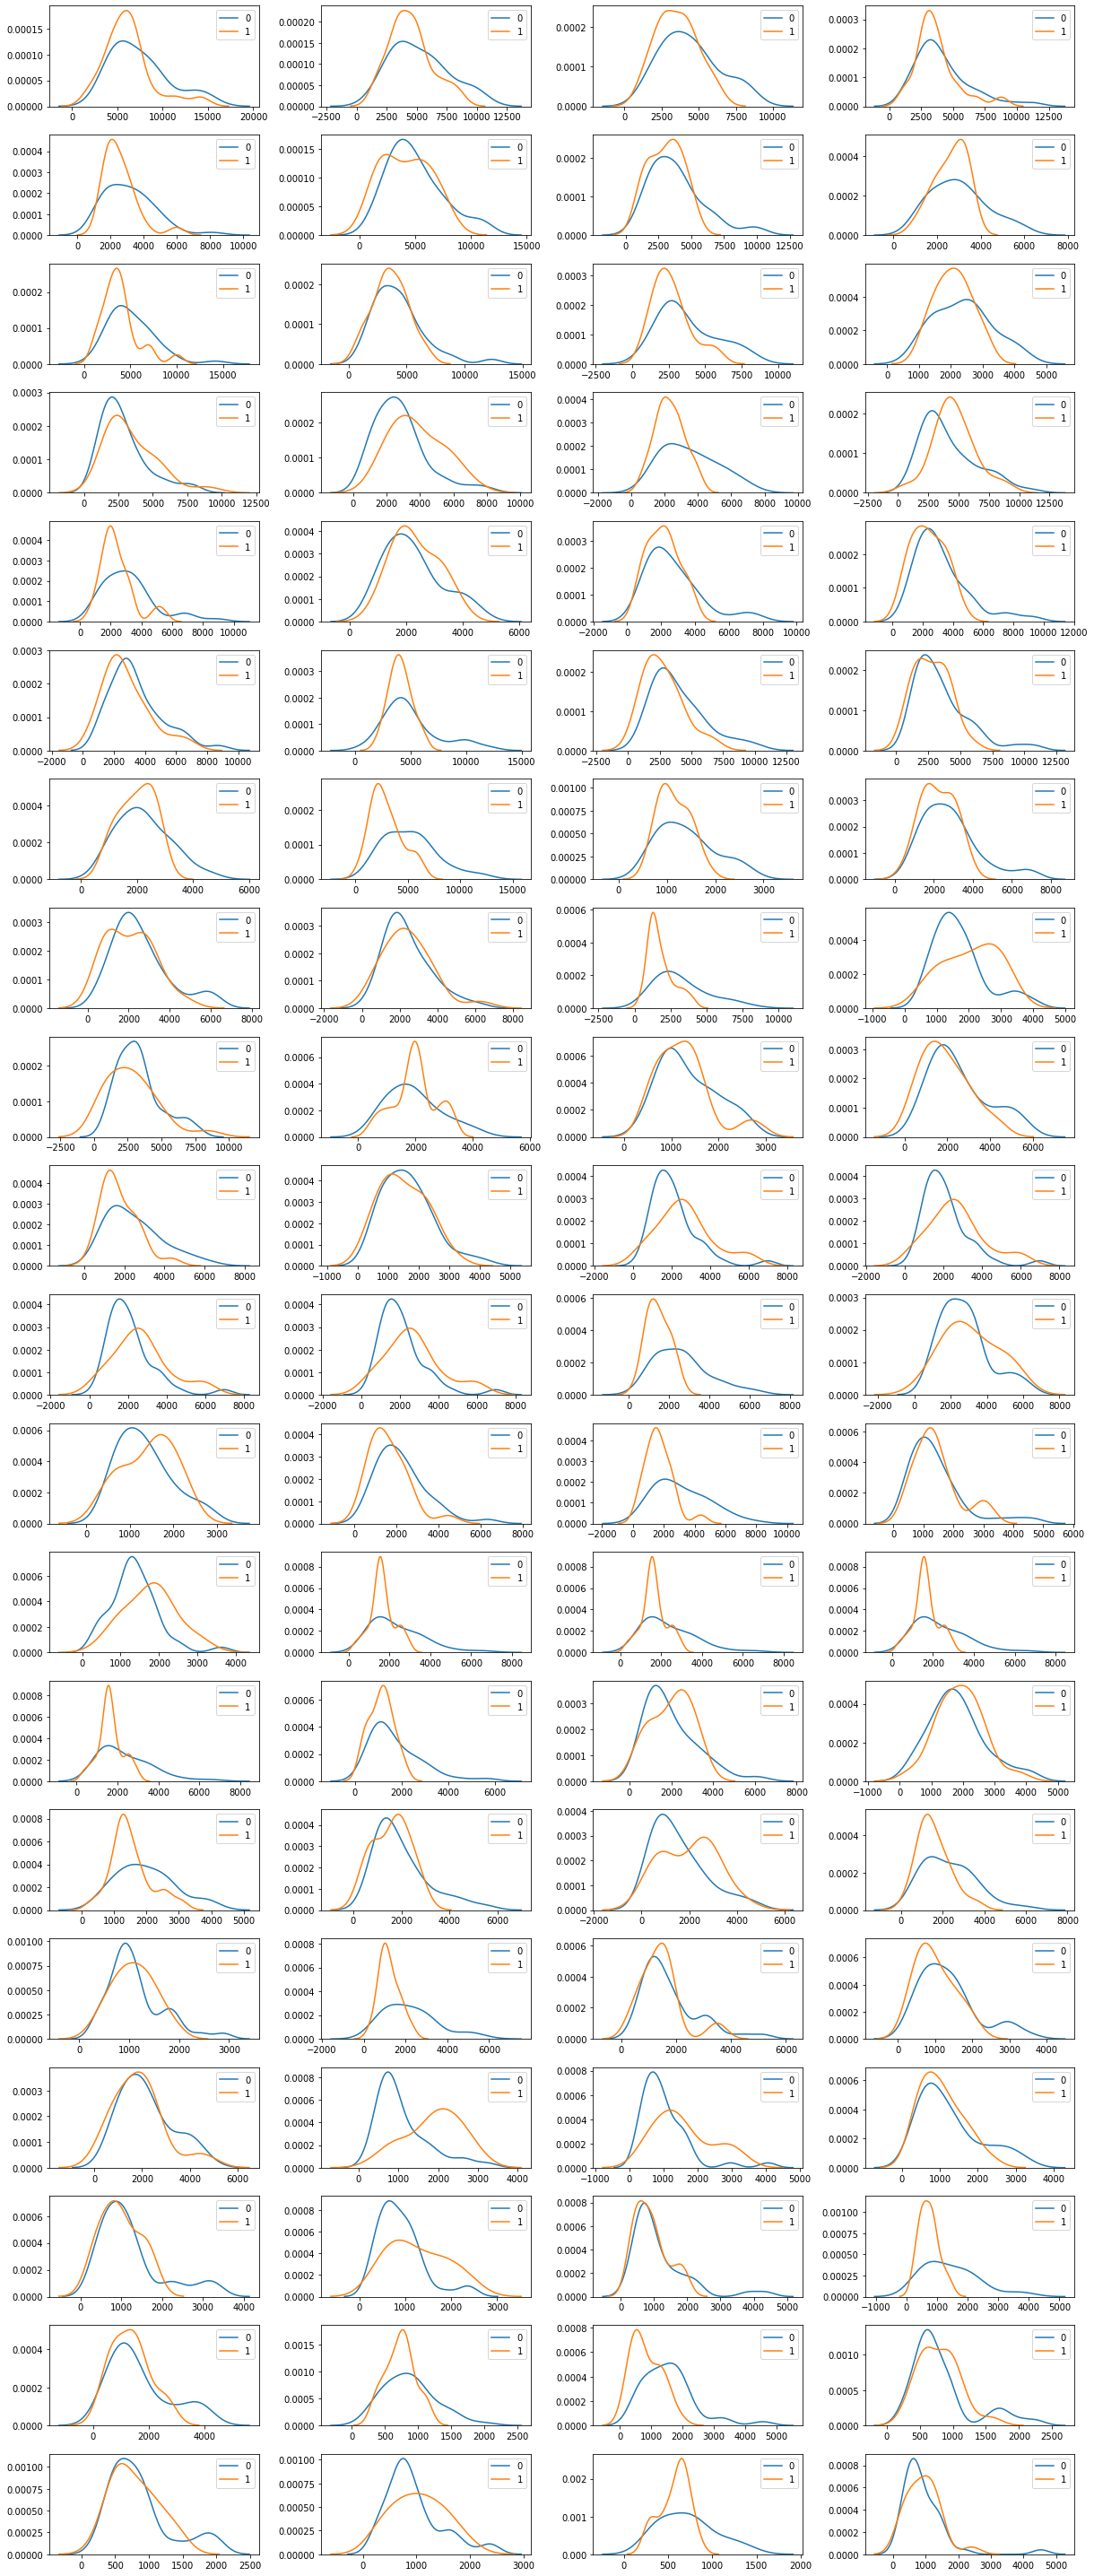

In [109]:
fig, ax = plt.subplots(20,4, figsize=(17,40))
feature_number = [str(i) for i in range(80)]
labels_number = [0, 1]
jj = -1
for ii, feature in enumerate(feature_number):
    if ii % 4 == 0:
        jj += 1
    for label in labels_number:
        sns.kdeplot(data_label[data_label['label']==label][feature].values.reshape(-1,), \
                    ax=ax[jj][ii % 4], label=label)

#[ax[ii].set_title("Feature {}".format(feature)) for ii, feature in enumerate(feature_number)] # Set band titles
#ax[0].legend(loc='upper center', bbox_to_anchor=(1.6, 1.25),
#          ncol=6) # Put legend outside plot
#[ax[ii].legend_.remove() for ii in np.arange(1,4)] # Remove all legends except the first one
fig.tight_layout()
plt.show()

We can see that most of the samples based on 0, which has no colon cancer, has a lager number than the samples based on 1.

In [96]:
flag = 0
feature_Number = [str(i) for i in range(2000)]
for i in feature_Number:
    if data_label_1[i].max() >= data_label_0[i].max():
        flag += 1
print("The total number of the largest number in class 1 which is greater than the number in class 0 is {}".format(flag))
print("Thus, we can see that the datasets which indicate the colon cancer has a smaller the largest number than the non-colon cancer dataset.")

The total number of the largest number in class 1 which is greater than the number in class 0 is 243
Thus, we can see that the datasets which indicate the colon cancer has a smaller the largest number than the non-colon cancer dataset.


### Correlations

In [154]:
names = data_label_1.columns.tolist()
names_10 = []
for i in names:
    if i == '10':
        break
    else:
        names_10.append(i)
data_label_1_10 = data_label_1.loc[:,names_10] 
data_label_0_10 = data_label_0.loc[:,names_10] 

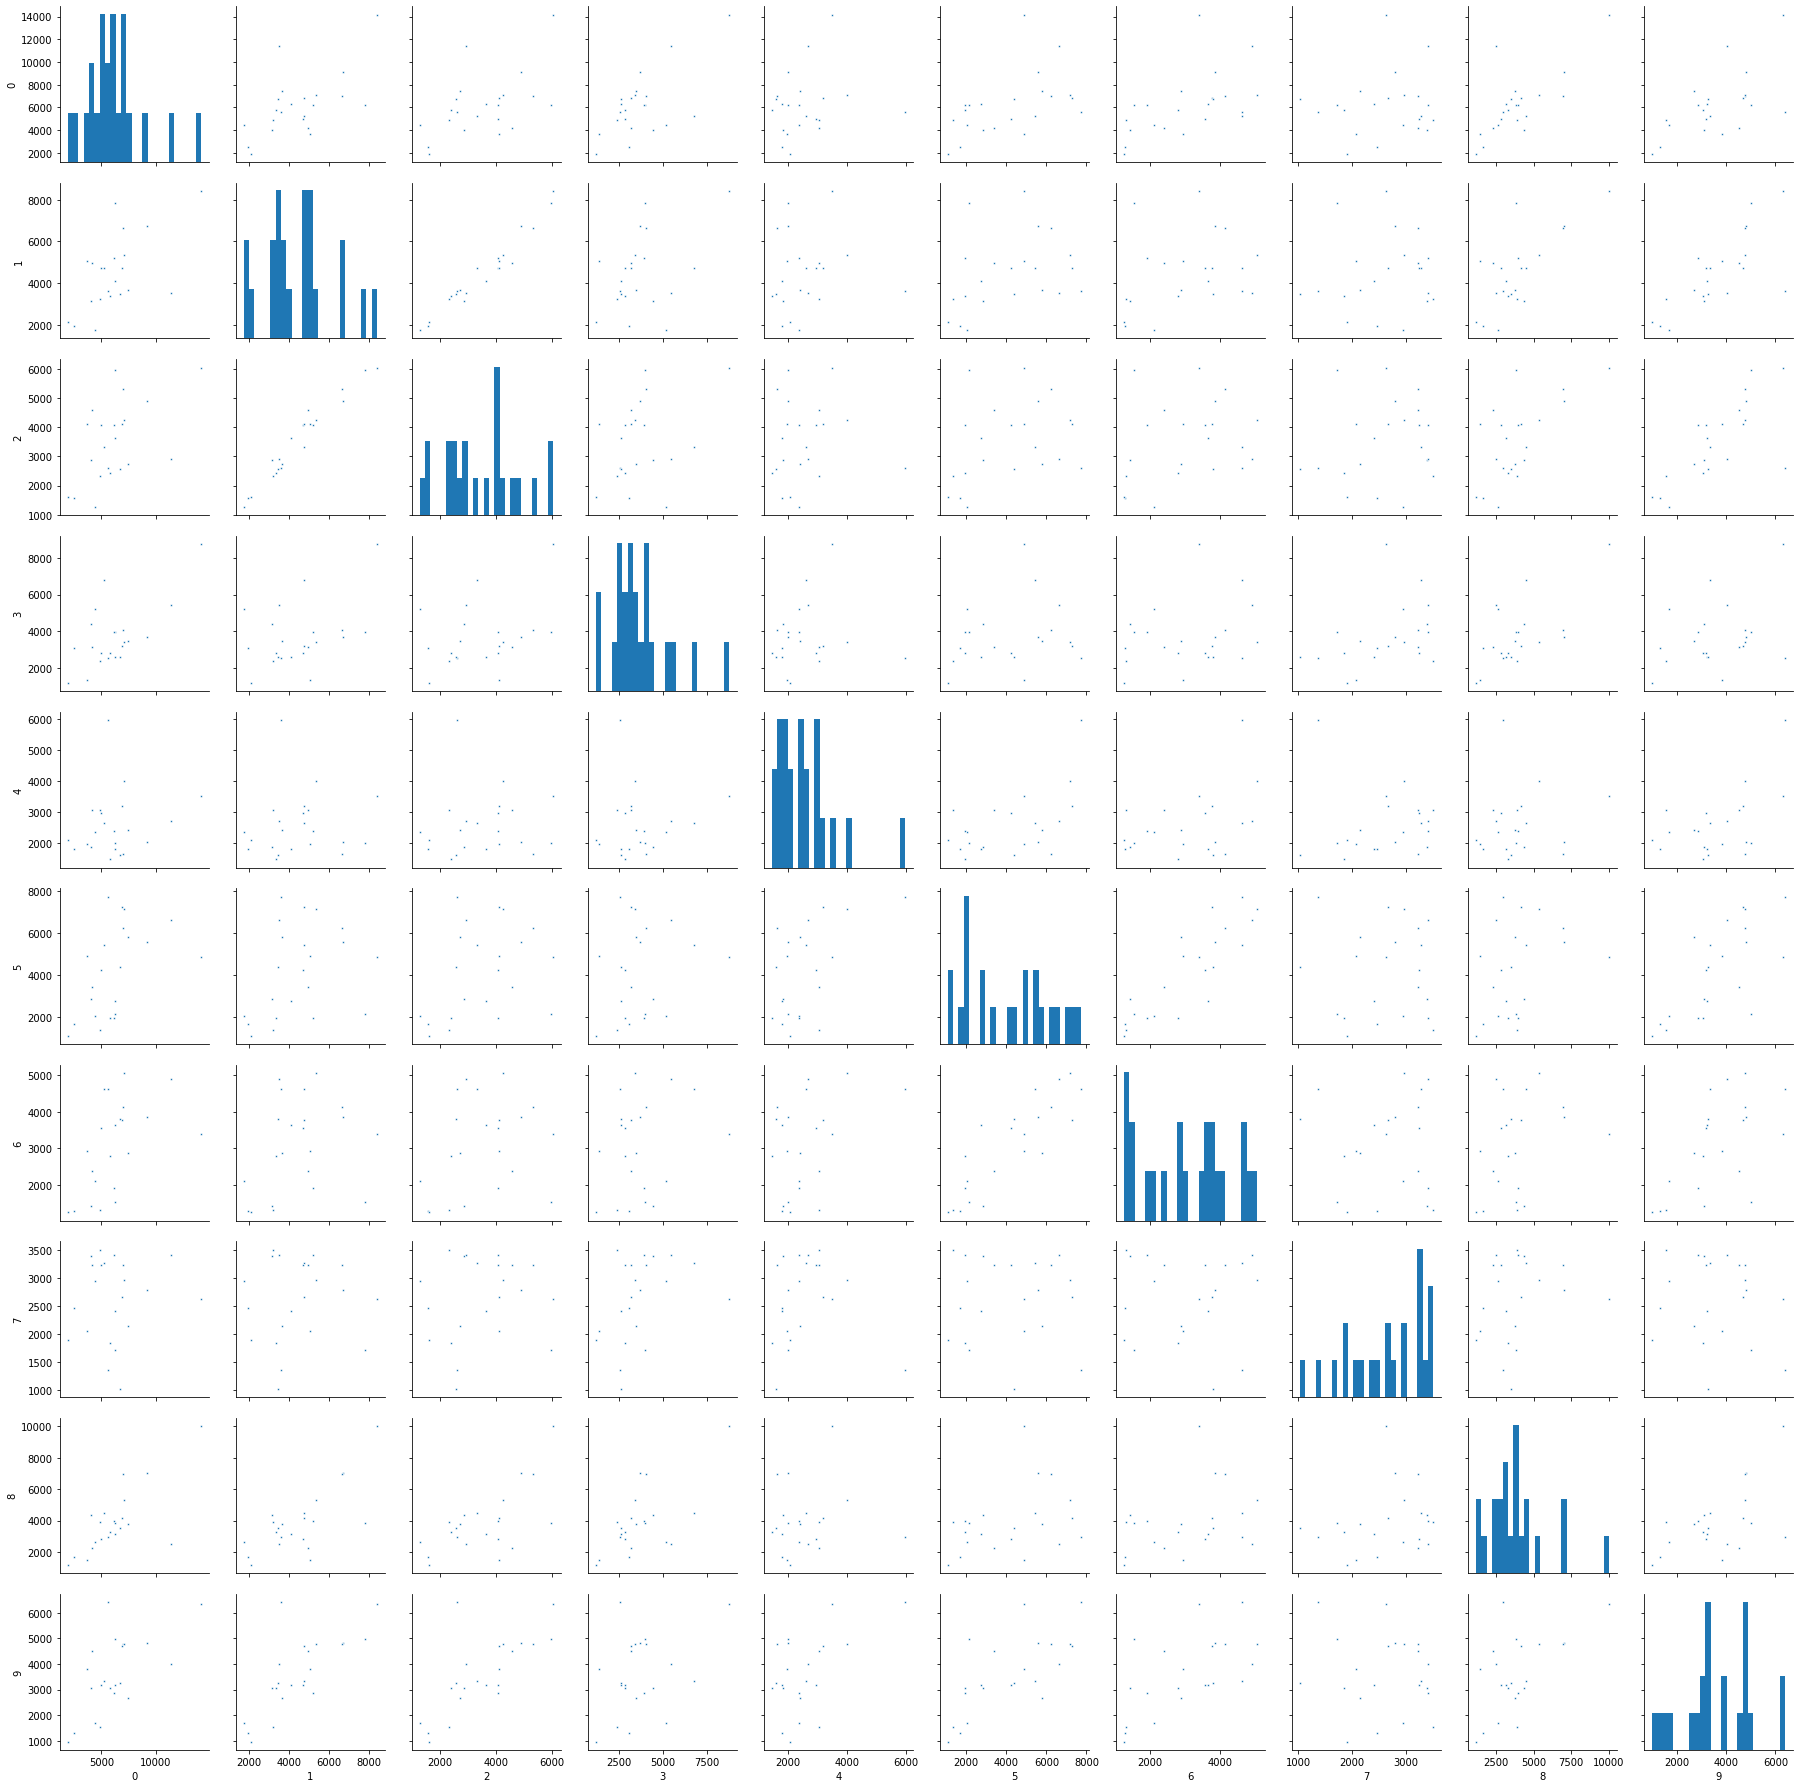

In [155]:
g = sns.pairplot(data_label_1_10, vars=[str(i) for i in data_label_1_10], \
                 plot_kws={'s' : 6}, diag_kws={'bins' : 25})

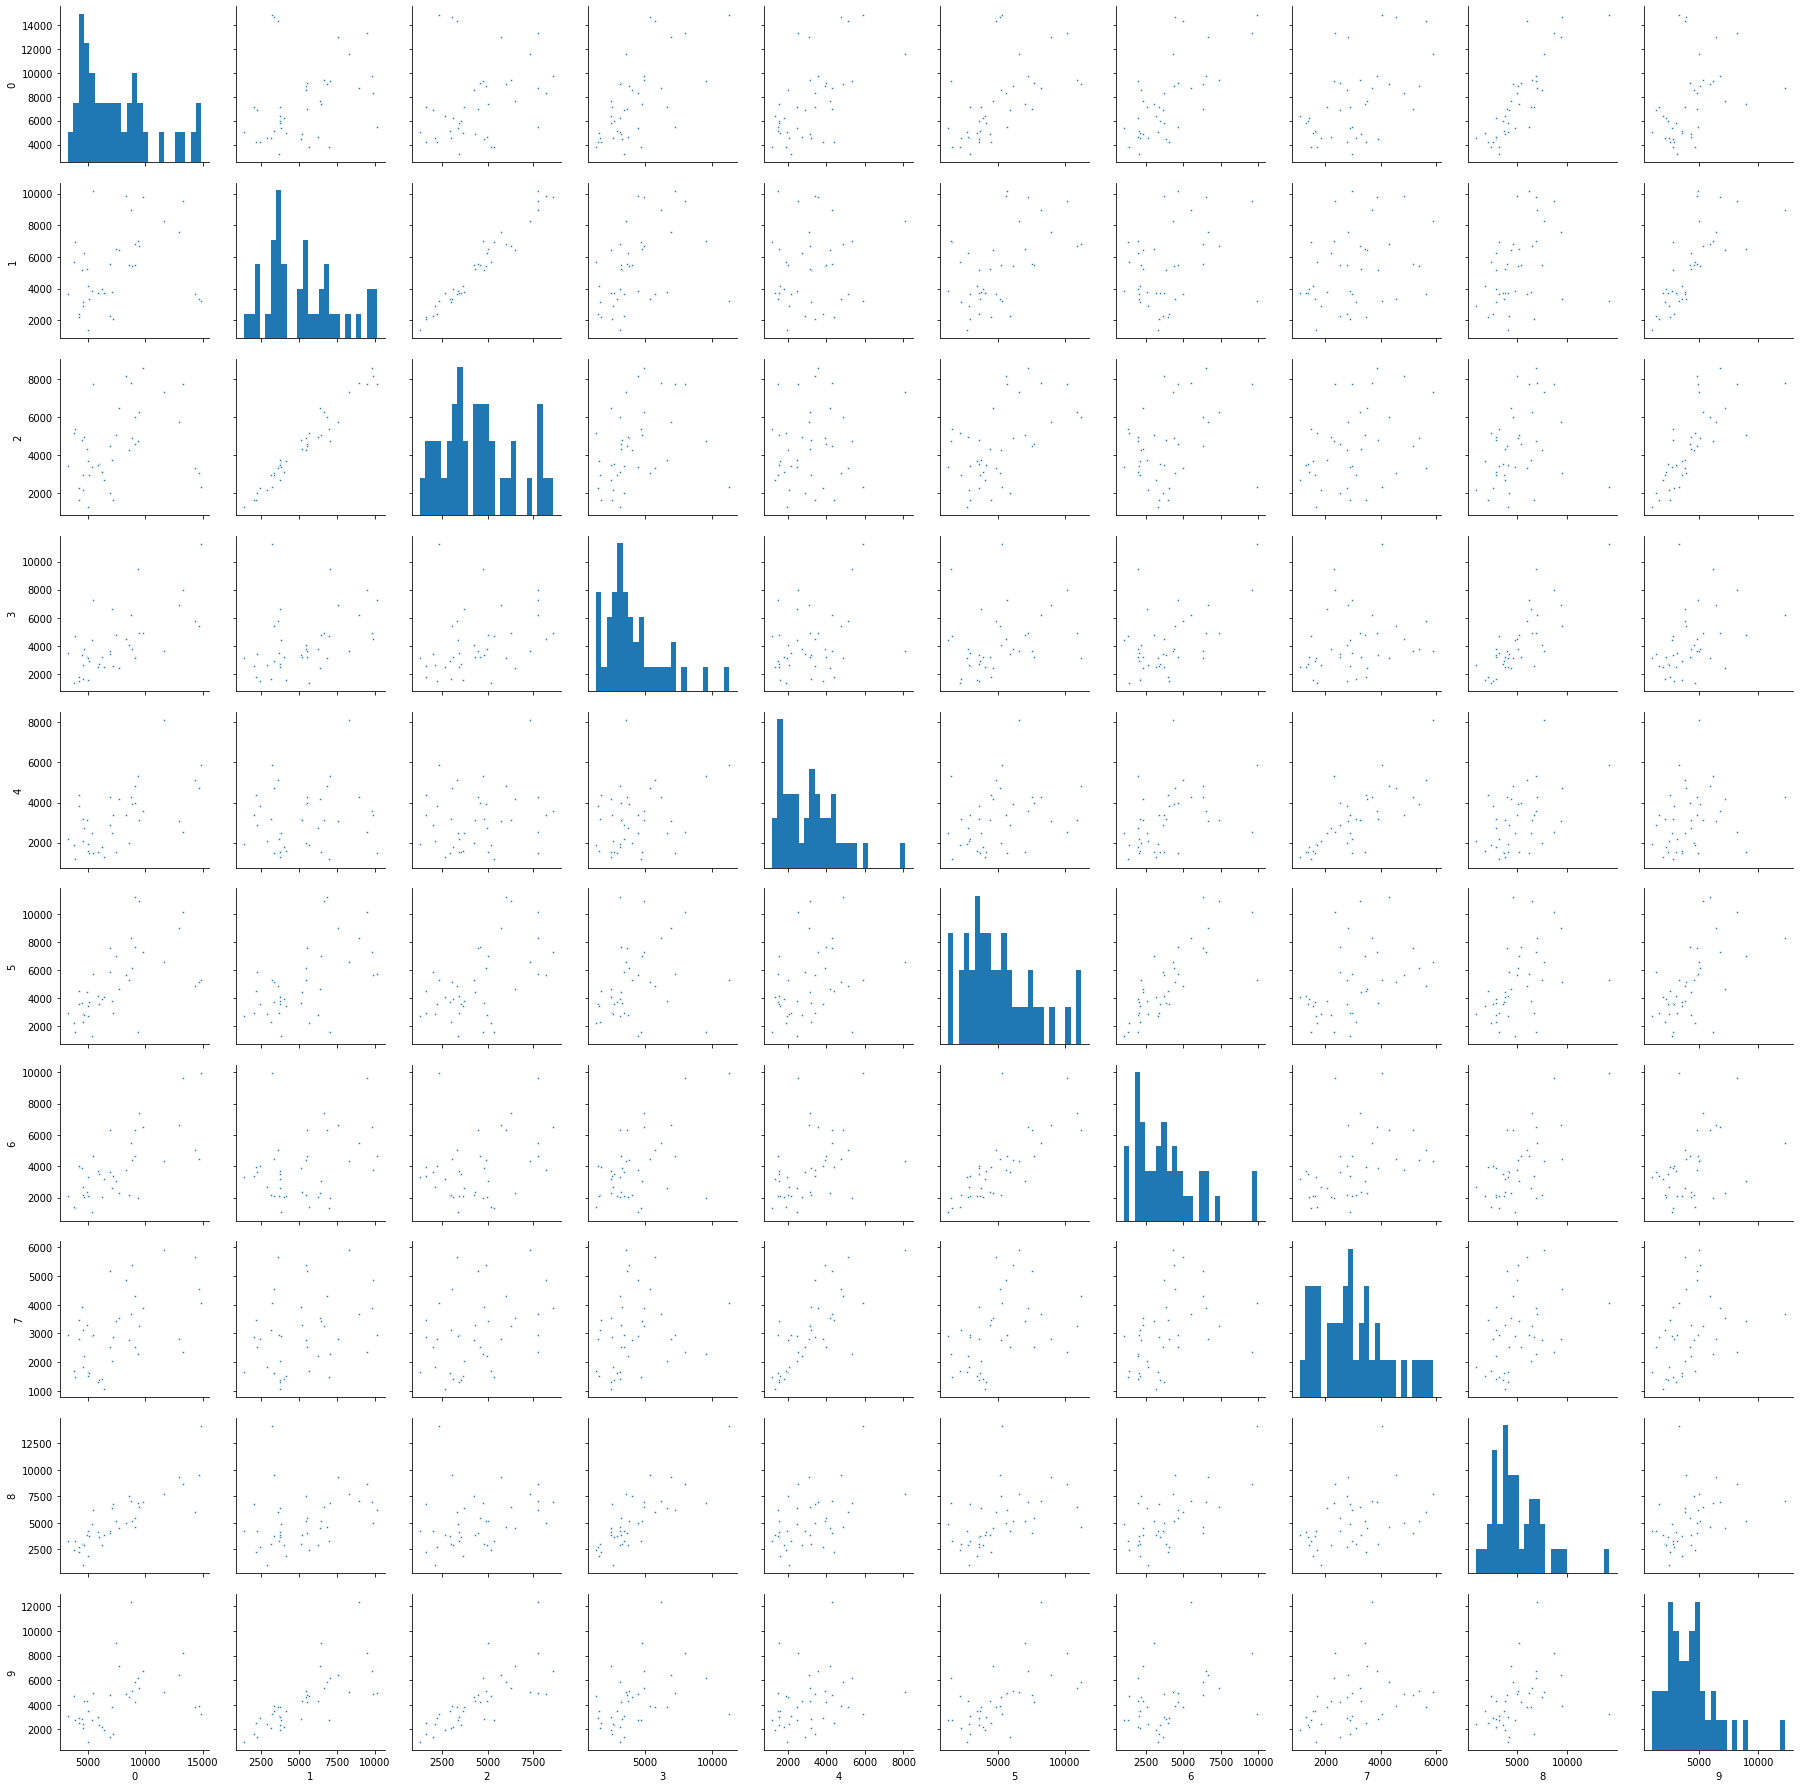

In [156]:
g = sns.pairplot(data_label_0_10, vars=[str(i) for i in data_label_0_10], \
                 plot_kws={'s' : 6}, diag_kws={'bins' : 25})

We can see the feature of 2 and 3 in both class 0 and 1 have the high correlations.

In [141]:
names = data_label_1.columns.tolist()
names_80 = []
for i in names:
    if i == '80':
        break
    else:
        names_80.append(i)

In [142]:
data_label_1_80 = data_label_1.loc[:,names_80] 
data_label_0_80 = data_label_0.loc[:,names_80] 

In [143]:
import plotly.graph_objects as go
correlations = data_label_1_80.corr()
fig = go.Figure(data=go.Heatmap(
                    z=correlations))
fig.show()

In [131]:
correlations_0 = data_label_0_80.corr()
fig = go.Figure(data=go.Heatmap(
                    z=correlations_0))
fig.show()

We can note that some features have the same number whether is subjected to class 0 or 1 so the correlation between them is the same. Thus, we can reduce the same colomn to one.